In [25]:
from data_processing_functions import *
from time import time
from itertools import combinations

In [36]:
csv_path = "/home/jens/masterData/AlgorithmTuner/RANDGELR/RANDGELR_10000_AlgorithmTunerData-data.csv"
df = pd.read_csv(csv_path, usecols = ["algName","objName","geName","dpI","tp","tn","fp","fn","cost","chromosome"], dtype = {"algName":"category","objName":"category","geName":"category"})


df["precision"]=df["tp"]/(df["tp"]+df["fp"])
df["recall"]=df["tp"]/(df["tp"]+df["fn"])
df["f1"]=2*df["tp"]/(2*df["tp"]+df["fn"]+df["fp"])
df["accuracy"]=(df["tp"]+df["tn"])/(df["tp"]+df["tn"]+df["fp"]+df["fn"])
df[["precision","recall","f1","accuracy"]].fillna(0,inplace=True)


csv_path = "/home/jens/masterData/AlgorithmTuner/RANDGELR/RANDGELRS_10000_AlgorithmTunerData-data.csv"
df_s = pd.read_csv(csv_path, usecols = ["algName","objName","geName","dpI","tp","tn","fp","fn","cost","chromosome"], dtype = {"algName":"category","objName":"category","geName":"category"})


df_s["precision"]=df_s["tp"]/(df_s["tp"]+df_s["fp"])
df_s["recall"]=df_s["tp"]/(df_s["tp"]+df_s["fn"])
df_s["f1"]=2*df_s["tp"]/(2*df_s["tp"]+df_s["fn"]+df_s["fp"])
df_s["accuracy"]=(df_s["tp"]+df_s["tn"])/(df_s["tp"]+df_s["tn"]+df_s["fp"]+df_s["fn"])
df_s[["precision","recall","f1","accuracy"]].fillna(0,inplace=True)

csv_path = "/home/jens/masterData/AlgorithmTuner/RANDGELR/GT-AlgorithmTunerData-data.csv"
df_gt = pd.read_csv(csv_path, usecols = ["algName","objName","geName","dpI","tp","tn","fp","fn","cost","chromosome"], dtype = {"algName":"category","objName":"category","geName":"category"})


df_gt["precision"]=df_gt["tp"]/(df_gt["tp"]+df_gt["fp"])
df_gt["recall"]=df_gt["tp"]/(df_gt["tp"]+df_gt["fn"])
df_gt["f1"]=2*df_gt["tp"]/(2*df_gt["tp"]+df_gt["fn"]+df_gt["fp"])
df_gt["accuracy"]=(df_gt["tp"]+df_gt["tn"])/(df_gt["tp"]+df_gt["tn"]+df_gt["fp"]+df_gt["fn"])
df_gt[["precision","recall","f1","accuracy"]].fillna(0,inplace=True)

/home/jens/.virtualenvs/master/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/jens/.virtualenvs/master/lib/python3.8/site-packages/pandas/core/frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [31]:
df.groupby("objName")[["f1","precision","recall","accuracy"]].corrwith(df["cost"])

,f1,precision,recall,accuracy
objName,,,,
AngleTubes,-0.291322,-0.280950,-0.340100,-0.438823
Ears,-0.289828,-0.429544,0.002129,-0.435272
Conrods,-0.392988,-0.548770,-0.086948,-0.339908
Gameboys,-0.259139,-0.420507,-0.003061,-0.429921


In [34]:
df_s.groupby("objName")[["f1","precision","recall","accuracy"]].corrwith(df_s["cost"])

,f1,precision,recall,accuracy
objName,,,,
AngleTubes,-0.146168,-0.150132,-0.319191,-0.415354
Ears,-0.506985,-0.601314,-0.210924,-0.477649
Conrods,-0.512087,-0.611679,-0.219575,-0.347519
Gameboys,-0.286187,-0.412182,-0.069462,-0.347700


In [38]:
df_gt.head()

,algName,objName,dpI,chromosome,tp,tn,fp,fn,cost,geName,precision,recall,f1,accuracy
0,SP,AngleTubes,0,1111111111111111111111110011101,28,3,0,0,0,GEF1,1.0,1.0,1.0,1.0
1,SP,AngleTubes,1,11111101111101111111111010101010001,26,9,0,0,0,GEF1,1.0,1.0,1.0,1.0
2,SP,AngleTubes,2,11111010101111110011101001100001100010,22,16,0,0,0,GEF1,1.0,1.0,1.0,1.0
3,SP,AngleTubes,3,111101110111110111010110111110110010,26,10,0,0,0,GEF1,1.0,1.0,1.0,1.0
4,SP,AngleTubes,4,11111111111111111010101111111010100100,29,9,0,0,0,GEF1,1.0,1.0,1.0,1.0


In [17]:
dfdp = df.groupby(["objName","dpI"])

objName_l = []
dpI_l = []
n_genes_l = []
gene_diff_l = []
cost_diff_l = []
c0_ones_l = []
c1_ones_l = []
for name, group in dfdp:
    chromosomes = group["chromosome"]
    costs = group["cost"]
    comb = combinations(group.index.values,2)

    for c0, c1 in comb:
        gene_diff = 0
        c0_ones = 0
        c1_ones = 0

        for chr0,chr1 in  zip(chromosomes[c0], chromosomes[c1]):
            if chr0 != chr1:
                gene_diff+=1
            c0_ones += int(chr0)
            c1_ones += int(chr1)
        # print(name,c0,c1,chromosomes[c0],chromosomes[c1],gene_diff,"/",len(chromosomes[c0]))
        objName_l.append(name[0])
        dpI_l.append(name[1])
        gene_diff_l.append(gene_diff)
        n_genes_l.append(len(chromosomes[c0]))
        cost_diff_l.append(costs[c0]-costs[c1])
        c0_ones_l.append(c0_ones)
        c1_ones_l.append(c1_ones)

df_comb = pd.DataFrame()
df_comb["objName"] = objName_l
df_comb["dpI"] = dpI_l
df_comb["n_genes"] = n_genes_l
df_comb["gene_diff"] = gene_diff_l
df_comb["gene_diff_frac"] = df_comb["gene_diff"]/df_comb["n_genes"]
df_comb["cost_diff"] = cost_diff_l
df_comb["c0_ones"] = c0_ones_l
df_comb["c1_ones"] = c1_ones_l



df_comb.head()

    


,objName,dpI,n_genes,gene_diff,gene_diff_frac,cost_diff,c0_ones,c1_ones
0,AngleTubes,0,31,14,0.451613,-1.77439,18,14
1,AngleTubes,0,31,17,0.548387,-1.45987,18,17
2,AngleTubes,0,31,17,0.548387,-0.75498,18,15
3,AngleTubes,0,31,16,0.516129,-0.42227,18,18
4,AngleTubes,0,31,12,0.387097,-0.12558,18,16


In [18]:
df_comb.groupby("objName")[["cost_diff"]].corrwith(df_comb["gene_diff_frac"])

,cost_diff
objName,
AngleTubes,0.089842
Conrods,0.048940
Ears,-0.042165
Gameboys,-0.020335


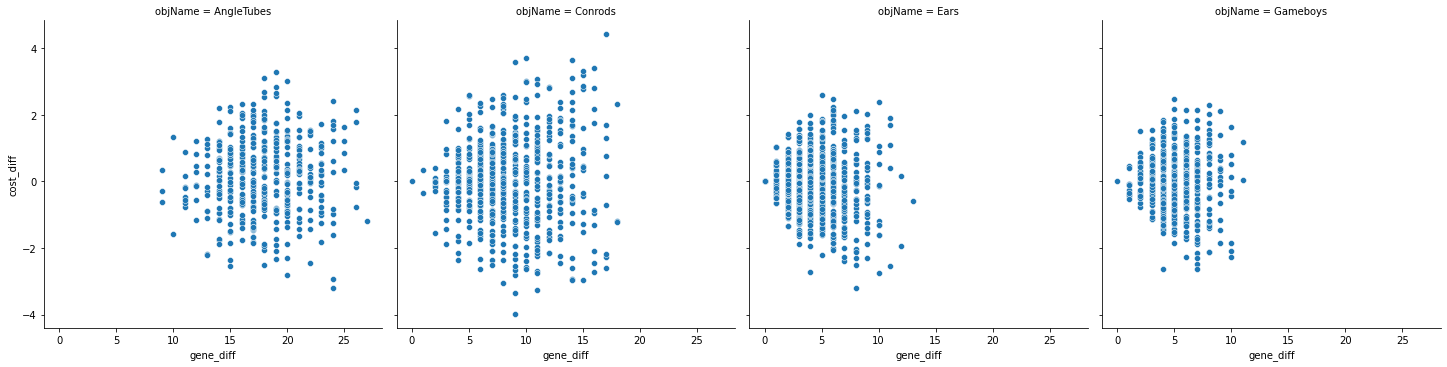

In [19]:
sns.relplot(x="gene_diff",y="cost_diff",col="objName",data=df_comb)